In [ ]:
# Installing Essential Libraries
!pip install ultralytics

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/3f/c8/b2ac54820cd983948475cd9b069168858c94f706d90695dbfdd97a807cbb/ultralytics-8.0.236-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.5/691.5 kB 43.3 MB/s eta 0:00:00


# Importing Libraries

In [ ]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import torch
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


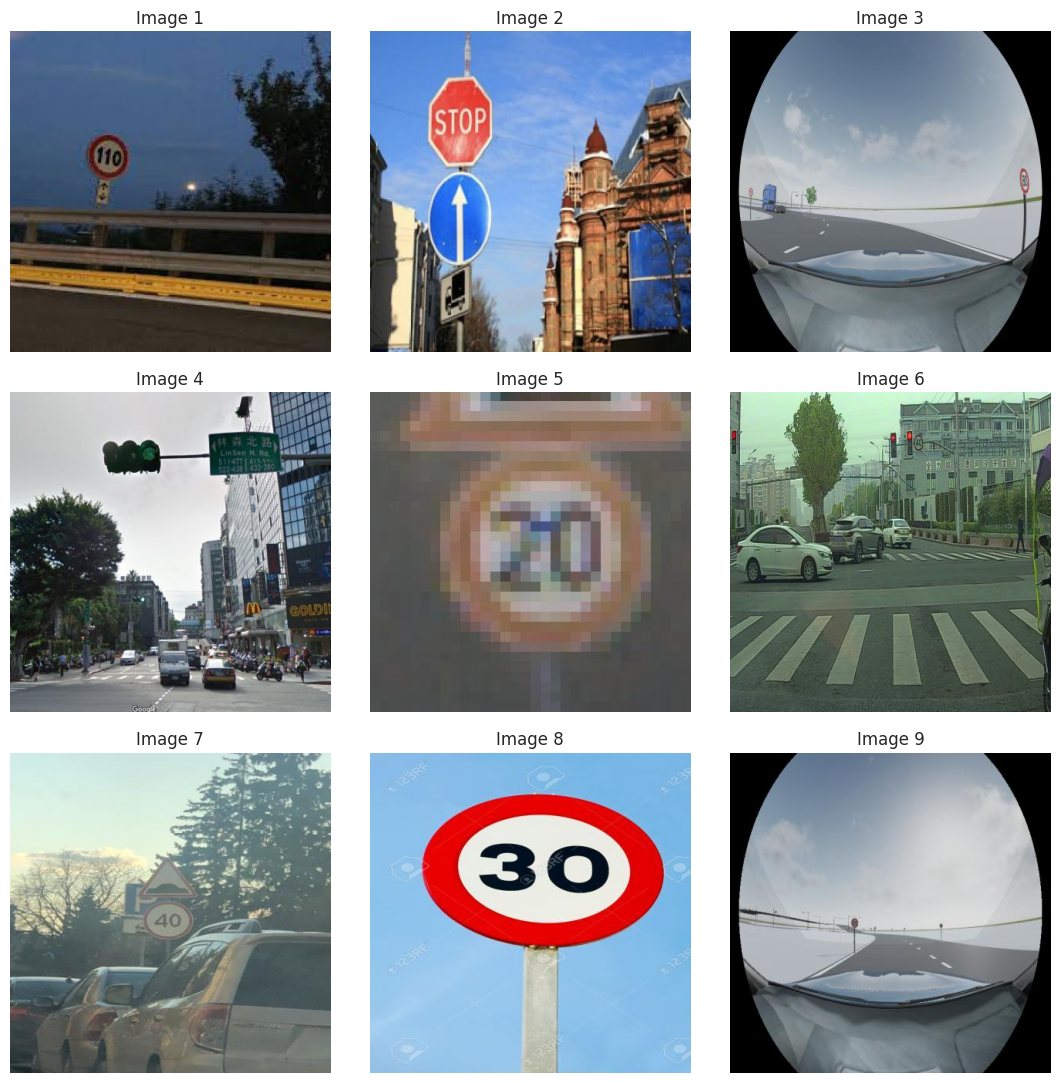

In [ ]:
Image_dir = '/kaggle/input/cardetection/train/images'

sample = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_image = random.sample(image_files, sample)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(sample):
    image = rand_image[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

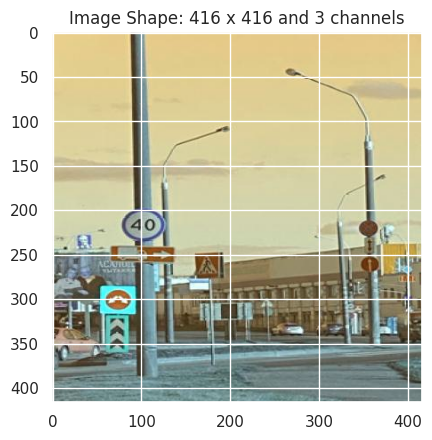

In [ ]:
image = cv2.imread('/kaggle/input/cardetection/train/images/road781_png.rf.eb64c78000a704daa7e5b88e8f835873.jpg')
h, w, c = image.shape
plt.imshow(image)
plt.title(f"Image Shape: {w} x {h} and 3 channels")
plt.show()

# Pretrained Model YOLOv8

In [ ]:
model = YOLO("yolov8n.pt")
image = '/kaggle/input/cardetection/train/images/road781_png.rf.eb64c78000a704daa7e5b88e8f835873.jpg'
predict = model.predict(image,imgsz=(416))

100%|██████████| 6.23M/6.23M [00:00<00:00, 256MB/s]



image 1/1 /kaggle/input/cardetection/train/images/road781_png.rf.eb64c78000a704daa7e5b88e8f835873.jpg: 416x416 3 cars, 6.4ms
Speed: 5.4ms preprocess, 6.4ms inference, 194.6ms postprocess per image at shape (1, 3, 416, 416)


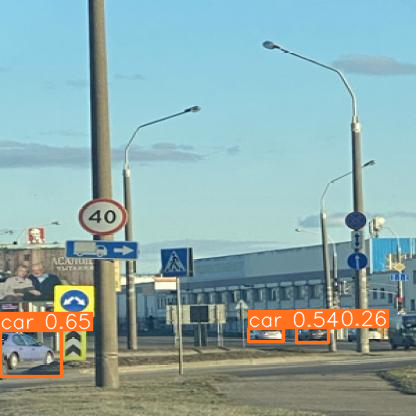

In [ ]:
plot = predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

# Final Model (Training data)

**Using yaml (which has the directory of train, test, vald data and object classes)**

In [ ]:
fn_model = YOLO('yolov8.yaml').load('yolov8n.pt')
result_fn = fn_model.train(data='/kaggle/input/cardetection/data.yaml',epochs=30,
                 imgsz = 416, batch = 80 ,lr0=0.0001, dropout= 0.15, device = 0)

WARNING ⚠️ no model scale passed. Assuming scale='n'.

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295

100%|██████████| 755k/755k [00:00<00:00, 78.7MB/s]
2024-01-07 02:45:41,347	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-07 02:45:41,836	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=15
WARNING ⚠️ no model scale passed. Assuming scale='n'.

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]      

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/cardetection/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:17<00:00, 201.25it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:03<00:00, 200.83it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000625), 63 bias(decay=0.0)
30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.54G     0.8577      3.564      1.109         18        416: 100%|██████████| 45/45 [00:19<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]

                   all        801        944     0.0579      0.745      0.126      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.31G     0.7249      2.389      1.025         29        416: 100%|██████████| 45/45 [00:16<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.71it/s]

                   all        801        944      0.416      0.336       0.26      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.56G     0.7198      2.014      1.012         18        416: 100%|██████████| 45/45 [00:16<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]

                   all        801        944      0.358      0.527      0.414      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.56G     0.6989      1.771     0.9917         17        416: 100%|██████████| 45/45 [00:16<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.70it/s]

                   all        801        944      0.471      0.552      0.542      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.31G     0.6755      1.527      0.982         21        416: 100%|██████████| 45/45 [00:16<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]

                   all        801        944      0.573      0.578      0.601      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.38G     0.6472       1.35     0.9686         19        416: 100%|██████████| 45/45 [00:16<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.69it/s]

                   all        801        944      0.733      0.685      0.742      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.56G     0.6408      1.257     0.9637         28        416: 100%|██████████| 45/45 [00:16<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]

                   all        801        944      0.716      0.683      0.755       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.38G     0.6241      1.145     0.9557         25        416: 100%|██████████| 45/45 [00:16<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]

                   all        801        944      0.806      0.715      0.798      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.38G     0.6177      1.088     0.9521         19        416: 100%|██████████| 45/45 [00:16<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]

                   all        801        944      0.828      0.723       0.81      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.38G     0.5931     0.9835     0.9417         22        416: 100%|██████████| 45/45 [00:16<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]

                   all        801        944      0.845      0.744      0.828      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.56G     0.5989     0.9618     0.9453         22        416: 100%|██████████| 45/45 [00:16<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.73it/s]

                   all        801        944      0.857      0.754       0.83      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.56G     0.5996     0.9193     0.9416         25        416: 100%|██████████| 45/45 [00:16<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        801        944      0.877      0.765      0.845      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.38G     0.5858     0.8851     0.9387         22        416: 100%|██████████| 45/45 [00:16<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.69it/s]

                   all        801        944      0.906      0.769      0.862      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.56G     0.5709     0.8448     0.9356         26        416: 100%|██████████| 45/45 [00:16<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.36it/s]

                   all        801        944      0.921      0.772      0.866      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.56G     0.5731      0.835     0.9347         28        416: 100%|██████████| 45/45 [00:18<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        801        944       0.88      0.808      0.872      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.56G     0.5666     0.7992     0.9312         29        416: 100%|██████████| 45/45 [00:19<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]

                   all        801        944      0.902      0.803      0.879      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.56G     0.5573     0.7655     0.9272         19        416: 100%|██████████| 45/45 [00:16<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]

                   all        801        944       0.91      0.818      0.884      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.38G     0.5513     0.7551     0.9309         18        416: 100%|██████████| 45/45 [00:16<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.56it/s]

                   all        801        944      0.955      0.806      0.888       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.38G     0.5384     0.7163     0.9231         21        416: 100%|██████████| 45/45 [00:16<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.73it/s]

                   all        801        944      0.918      0.817       0.89      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.38G      0.548     0.7188     0.9265         16        416: 100%|██████████| 45/45 [00:16<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]

                   all        801        944      0.937      0.828      0.896      0.775


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.38G      0.544     0.5547     0.8819         12        416: 100%|██████████| 45/45 [00:19<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        801        944      0.892      0.806      0.886       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.31G     0.5302     0.5027     0.8723         16        416: 100%|██████████| 45/45 [00:15<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        801        944      0.939      0.822      0.897      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.31G     0.5273     0.4832     0.8711         11        416: 100%|██████████| 45/45 [00:15<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all        801        944      0.916      0.847      0.906      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.31G     0.5104      0.464     0.8666         10        416: 100%|██████████| 45/45 [00:16<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        801        944      0.953      0.829       0.91      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.56G     0.5056     0.4416     0.8687         11        416: 100%|██████████| 45/45 [00:15<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        801        944      0.948      0.846      0.913      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.56G     0.4958     0.4187     0.8596         10        416: 100%|██████████| 45/45 [00:16<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        801        944      0.941      0.859      0.923      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30       4.3G     0.4977      0.401     0.8649         14        416: 100%|██████████| 45/45 [00:16<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        801        944      0.926       0.87      0.922      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30       4.3G     0.4861     0.3885     0.8642         10        416: 100%|██████████| 45/45 [00:15<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all        801        944      0.919       0.87      0.922        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.31G     0.4794      0.375     0.8527         12        416: 100%|██████████| 45/45 [00:16<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        801        944      0.932      0.864      0.923      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.38G     0.4741     0.3671     0.8563         13        416: 100%|██████████| 45/45 [00:16<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]

                   all        801        944      0.934       0.86      0.925      0.807



30 epochs completed in 0.185 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.236 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8 summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.03s/it]


                   all        801        944      0.934       0.86      0.925      0.807
           Green Light        801        122      0.872      0.631      0.745      0.419
             Red Light        801        108       0.84      0.581      0.697       0.44
       Speed Limit 100        801         52      0.904      0.942       0.98      0.902
       Speed Limit 110        801         17      0.835          1      0.983      0.901
       Speed Limit 120        801         60      0.982      0.906      0.993      0.902
        Speed Limit 20        801         56      0.981      0.906      0.979      0.883
        Speed Limit 30        801         74      0.941      0.946      0.972      0.909
        Speed Limit 40        801         55      0.948      0.909      0.983      0.868
        Speed Limit 50        801         71          1      0.867      0.947      0.856
        Speed Limit 60        801         76      0.958      0.894      0.937      0.854
        Speed Limit 7

In [ ]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

# Metrics Visual

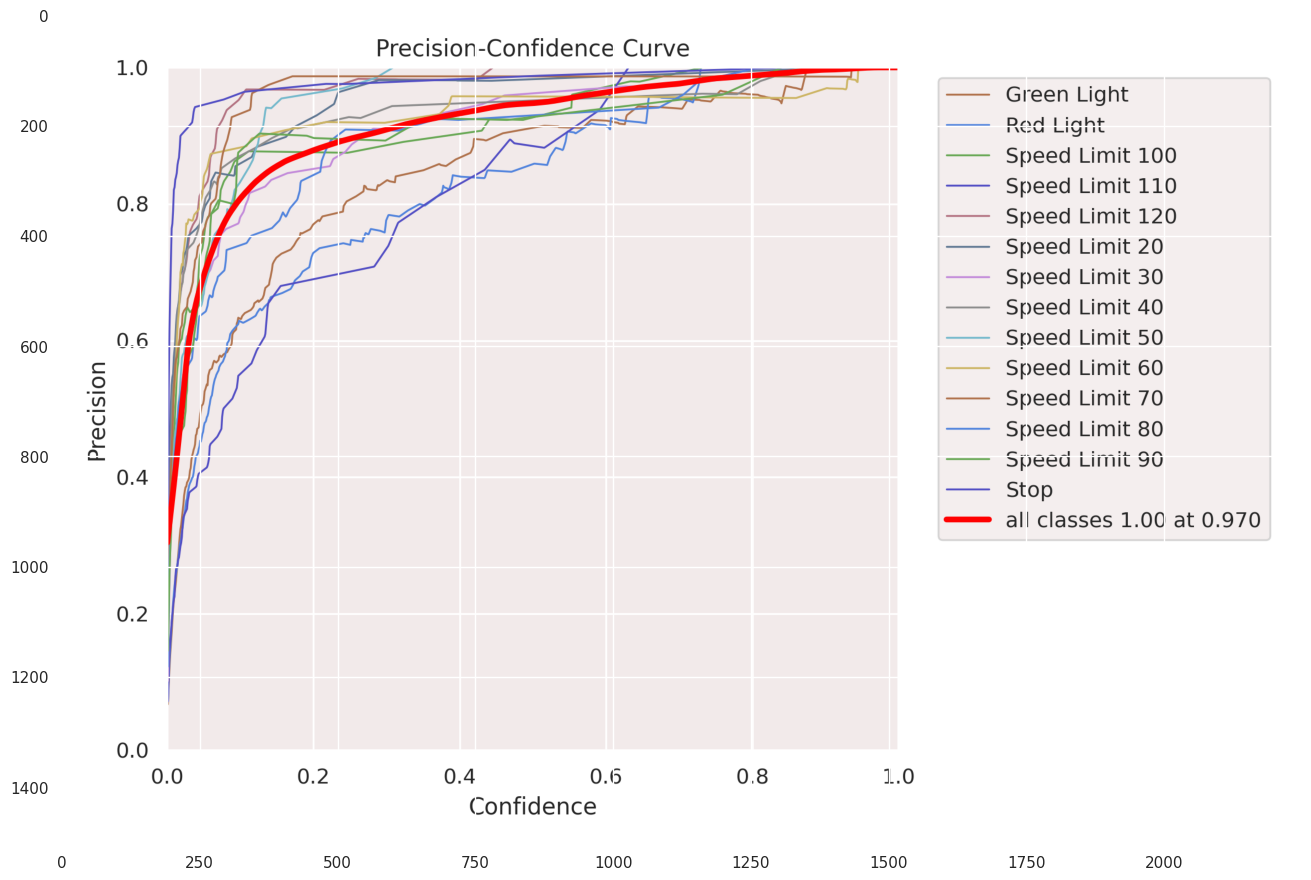

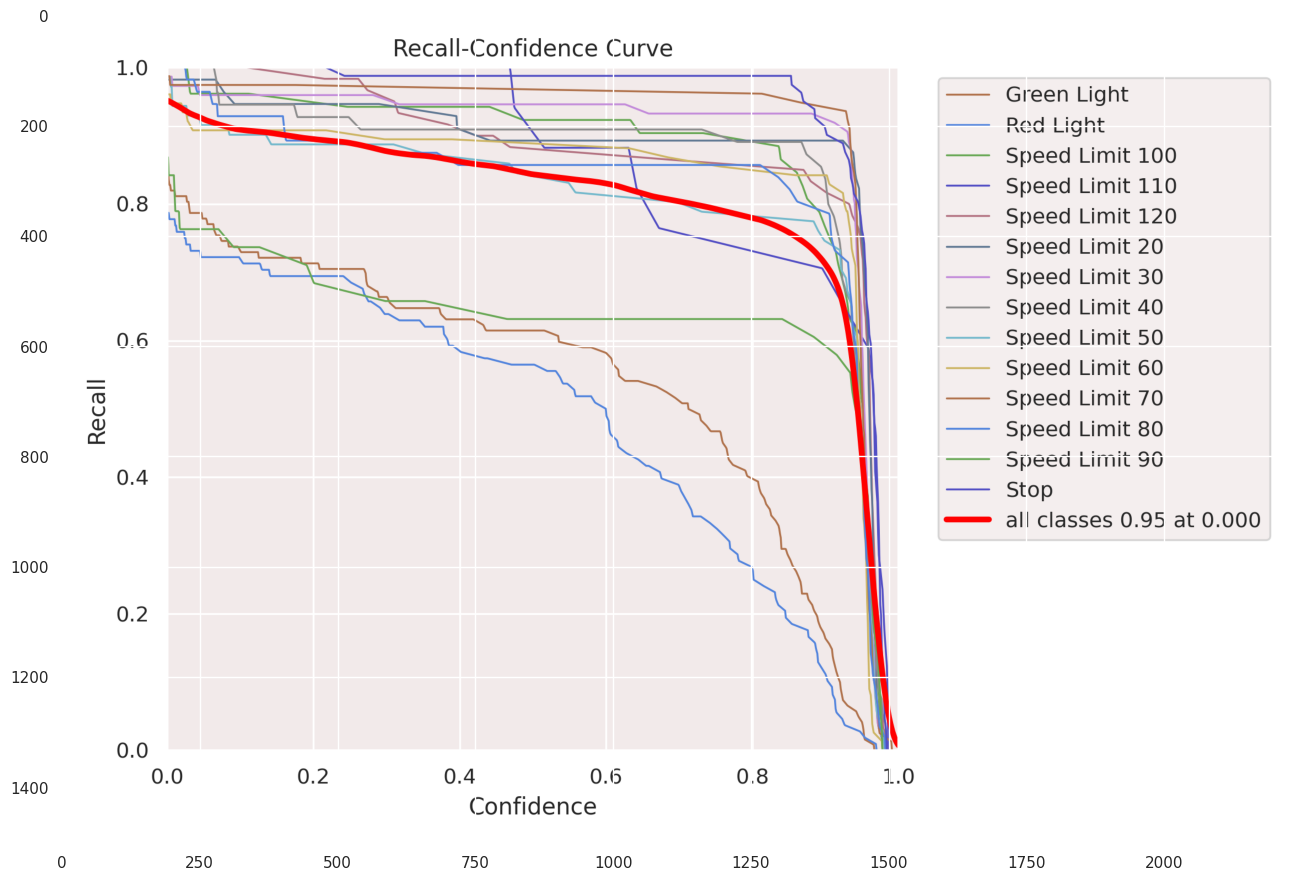

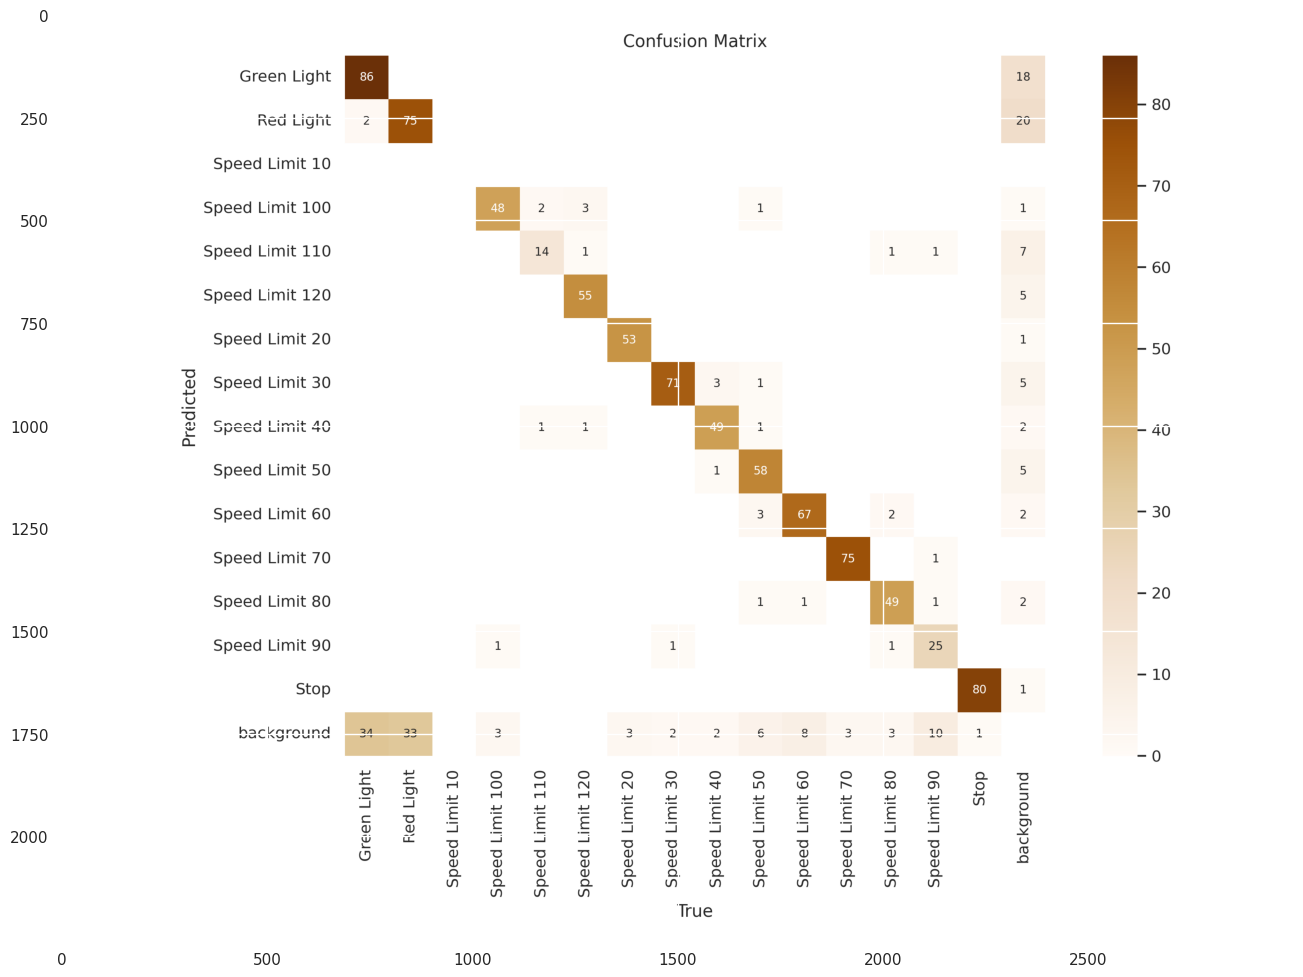

In [ ]:
for i in list_of_metrics:

    image = cv2.imread(f'/kaggle/working/runs/detect/train/{i}')
    plt.figure(figsize=(16, 12))
    plt.imshow(image)
    plt.show()

In [ ]:
# info of each epoch during training

Result = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
Result.head(5)

epoch           train/box_loss           train/cls_loss  \
0                        1                  0.85769                   3.5639   
1                        2                  0.72486                   2.3887   
2                        3                  0.71984                   2.0141   
3                        4                  0.69888                   1.7709   
4                        5                  0.67552                   1.5272   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                  1.10870                  0.05793                  0.74468   
1                  1.02480                  0.41645                  0.33574   
2                  1.01160                  0.35785                  0.52669   
3                  0.99172                  0.47068                  0.55210   
4                  0.98203                  0.57254                  0.57847   

          metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
0                  0.12620                  0.11197                  0.65428   
1                  0.26014                  0.22478                  0.66541   
2                  0.41356                  0.33920                  0.74033   
3                  0.54155                  0.45195                  0.64459   
4                  0.60131                  0.49284                  0.67475   

              val/cls_loss             val/dfl_loss                   lr/pg0  \
0                   3.2091                  0.94434                 0.000171   
1                   2.1890                  0.94356                 0.000335   
2                   1.8942                  0.98569                 0.000488   
3                   1.5545                  0.94418                 0.000474   
4                   1.4607                  0.95707                 0.000474   

                    lr/pg1                   lr/pg2  
0                 0.000171                 0.000171  
1                 0.000335                 0.000335  
2                 0.000488                 0.000488  
3                 0.000474                 0.000474  
4                 0.000474                 0.000474

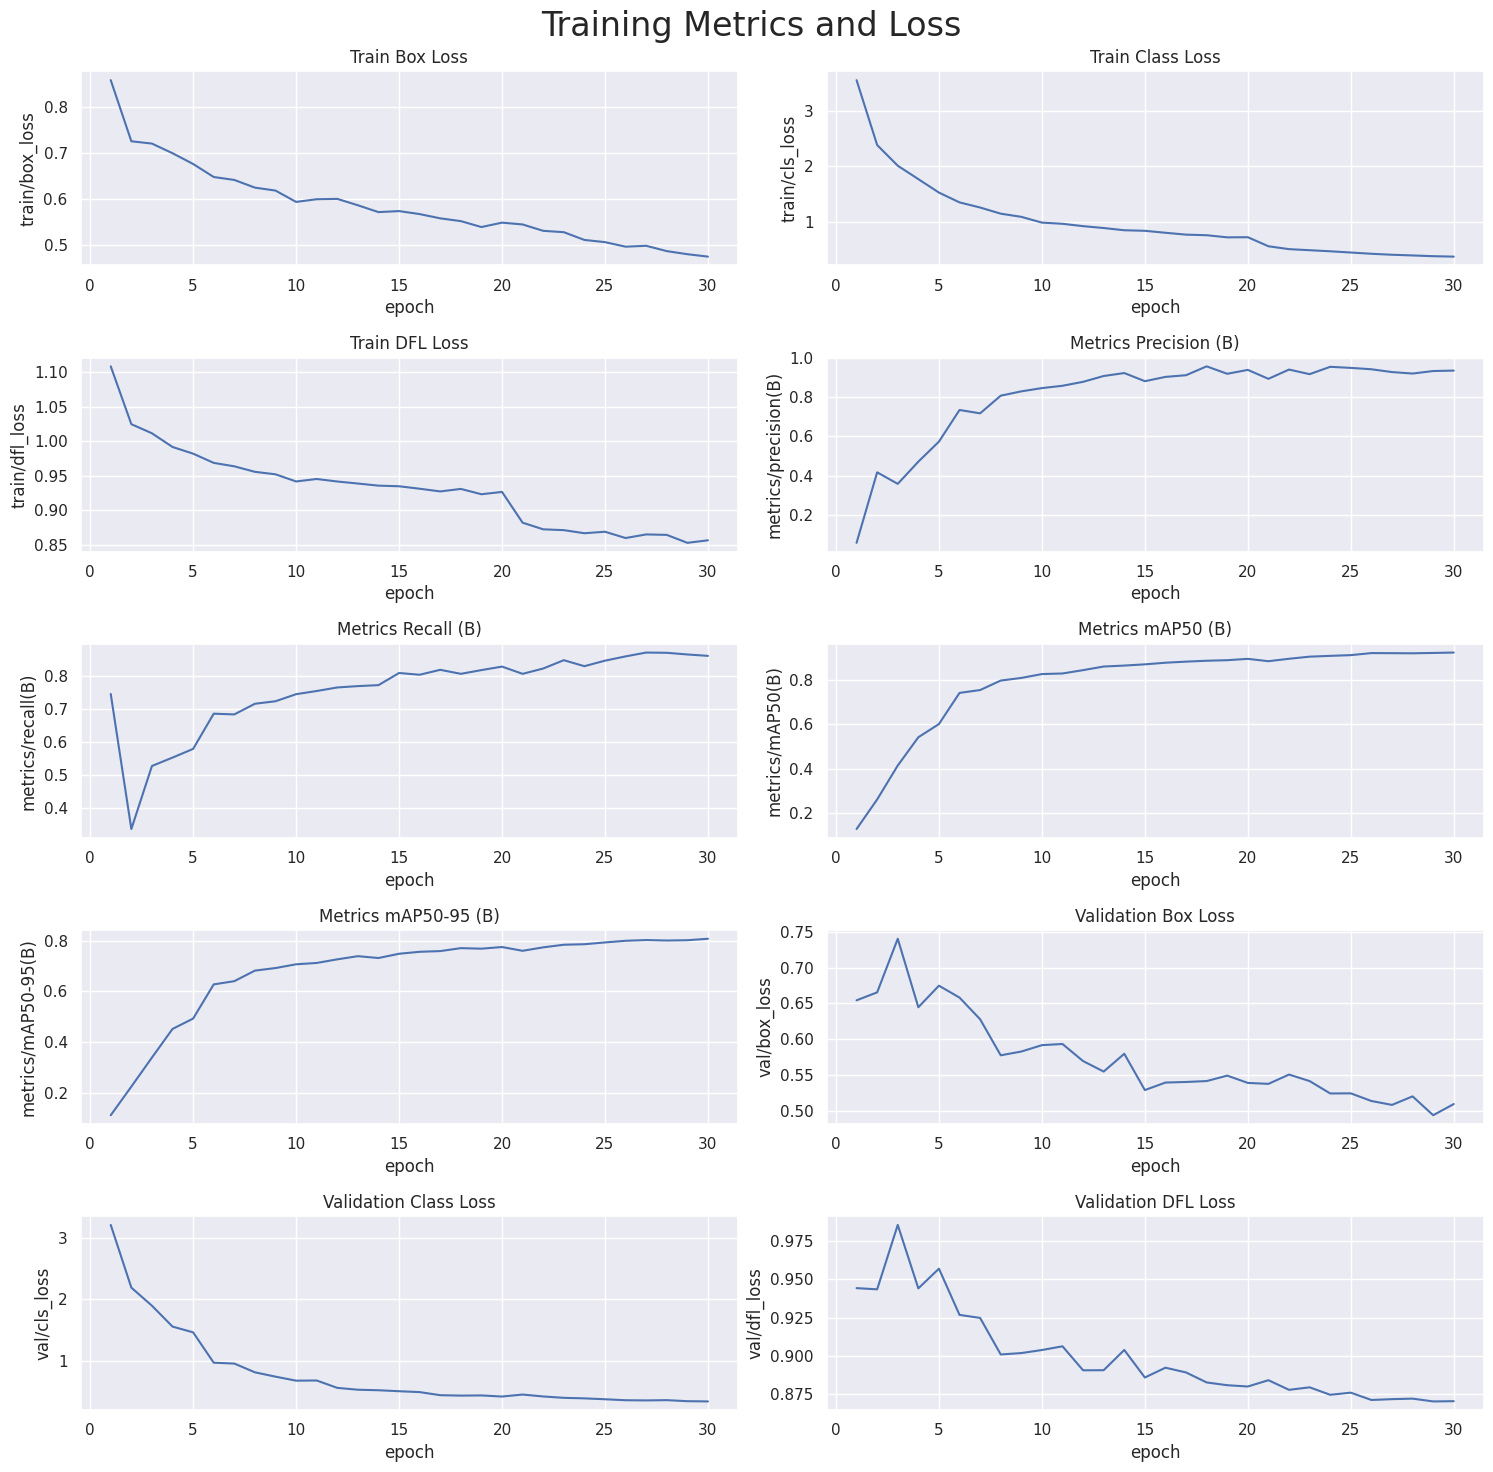

In [ ]:
df = Result.copy(deep=True)

df.columns = Result.columns.str.strip()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

# Test Data

In [ ]:
# validating the trained model for the given objective with test data

Valid_model  = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
metric = Valid_model.val(split = 'test')

Ultralytics YOLOv8.0.236 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8 summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/cardetection/test/labels... 638 images, 1 backgrounds, 0 corrupt: 100%|██████████| 638/638 [00:03<00:00, 171.74it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/test is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:04<00:00,  8.13it/s]


                   all        638        770      0.888      0.852      0.907      0.775
           Green Light        638        110      0.904      0.682      0.818      0.482
             Red Light        638         94      0.785      0.628      0.684      0.439
        Speed Limit 10        638          3      0.727      0.907      0.913      0.648
       Speed Limit 100        638         46      0.833      0.935      0.972      0.862
       Speed Limit 110        638         21      0.927       0.81      0.853      0.754
       Speed Limit 120        638         44       0.89      0.977      0.971      0.887
        Speed Limit 20        638         46      0.935      0.936      0.956      0.865
        Speed Limit 30        638         60       0.94      0.833      0.902       0.84
        Speed Limit 40        638         53      0.972      0.943      0.985      0.854
        Speed Limit 50        638         50      0.801        0.8      0.857      0.794
        Speed Limit 6

In [ ]:
# final results of test data

precision = round(metric.results_dict["metrics/precision(B)"] * 100, 2)
recall = round(metric.results_dict["metrics/recall(B)"] * 100, 2)
mAP50 = round(metric.results_dict["metrics/mAP50(B)"] * 100, 2)
mAP50_95 = round(metric.results_dict["metrics/mAP50-95(B)"] * 100, 2)

In [ ]:
table = [["Precision", precision],
         ["Recall", recall],
         ["mAP50", mAP50],
         ["mAP50-95", mAP50_95]]

# Printing the table
print('\033[1mMetrics of Test Data:\033[0m \n',tabulate(table, headers=["Metric", "Value"]))

Metrics of Test Data: 
 Metric       Value
---------  -------
Precision    88.83
Recall       85.21
mAP50        90.65
mAP50-95     77.47


# Validating the model with validation data

In [ ]:
image_dir = '/kaggle/input/cardetection/valid/images'

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir)]

random_image = random.sample(image_files,16) # selecting the random images

In [ ]:
for img in random_image:
    image = cv2.imread(img)
    results = fn_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)


0: 416x416 2 Red Lights, 10.1ms
Speed: 5.2ms preprocess, 10.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train2

0: 416x416 1 Speed Limit 110, 6.1ms
Speed: 1.3ms preprocess, 6.1ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train3

0: 416x416 1 Speed Limit 70, 6.1ms
Speed: 0.8ms preprocess, 6.1ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train4

0: 416x416 1 Stop, 5.8ms
Speed: 1.0ms preprocess, 5.8ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train5

0: 416x416 1 Speed Limit 90, 5.7ms
Speed: 0.9ms preprocess, 5.7ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train6

0: 416x416 1 Green Light, 6.8ms
Speed: 1.0ms preprocess, 6.8ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train7

0: 41

# Plotting Images After Detecting the Object

**Note: These are the images that are used in above steps**

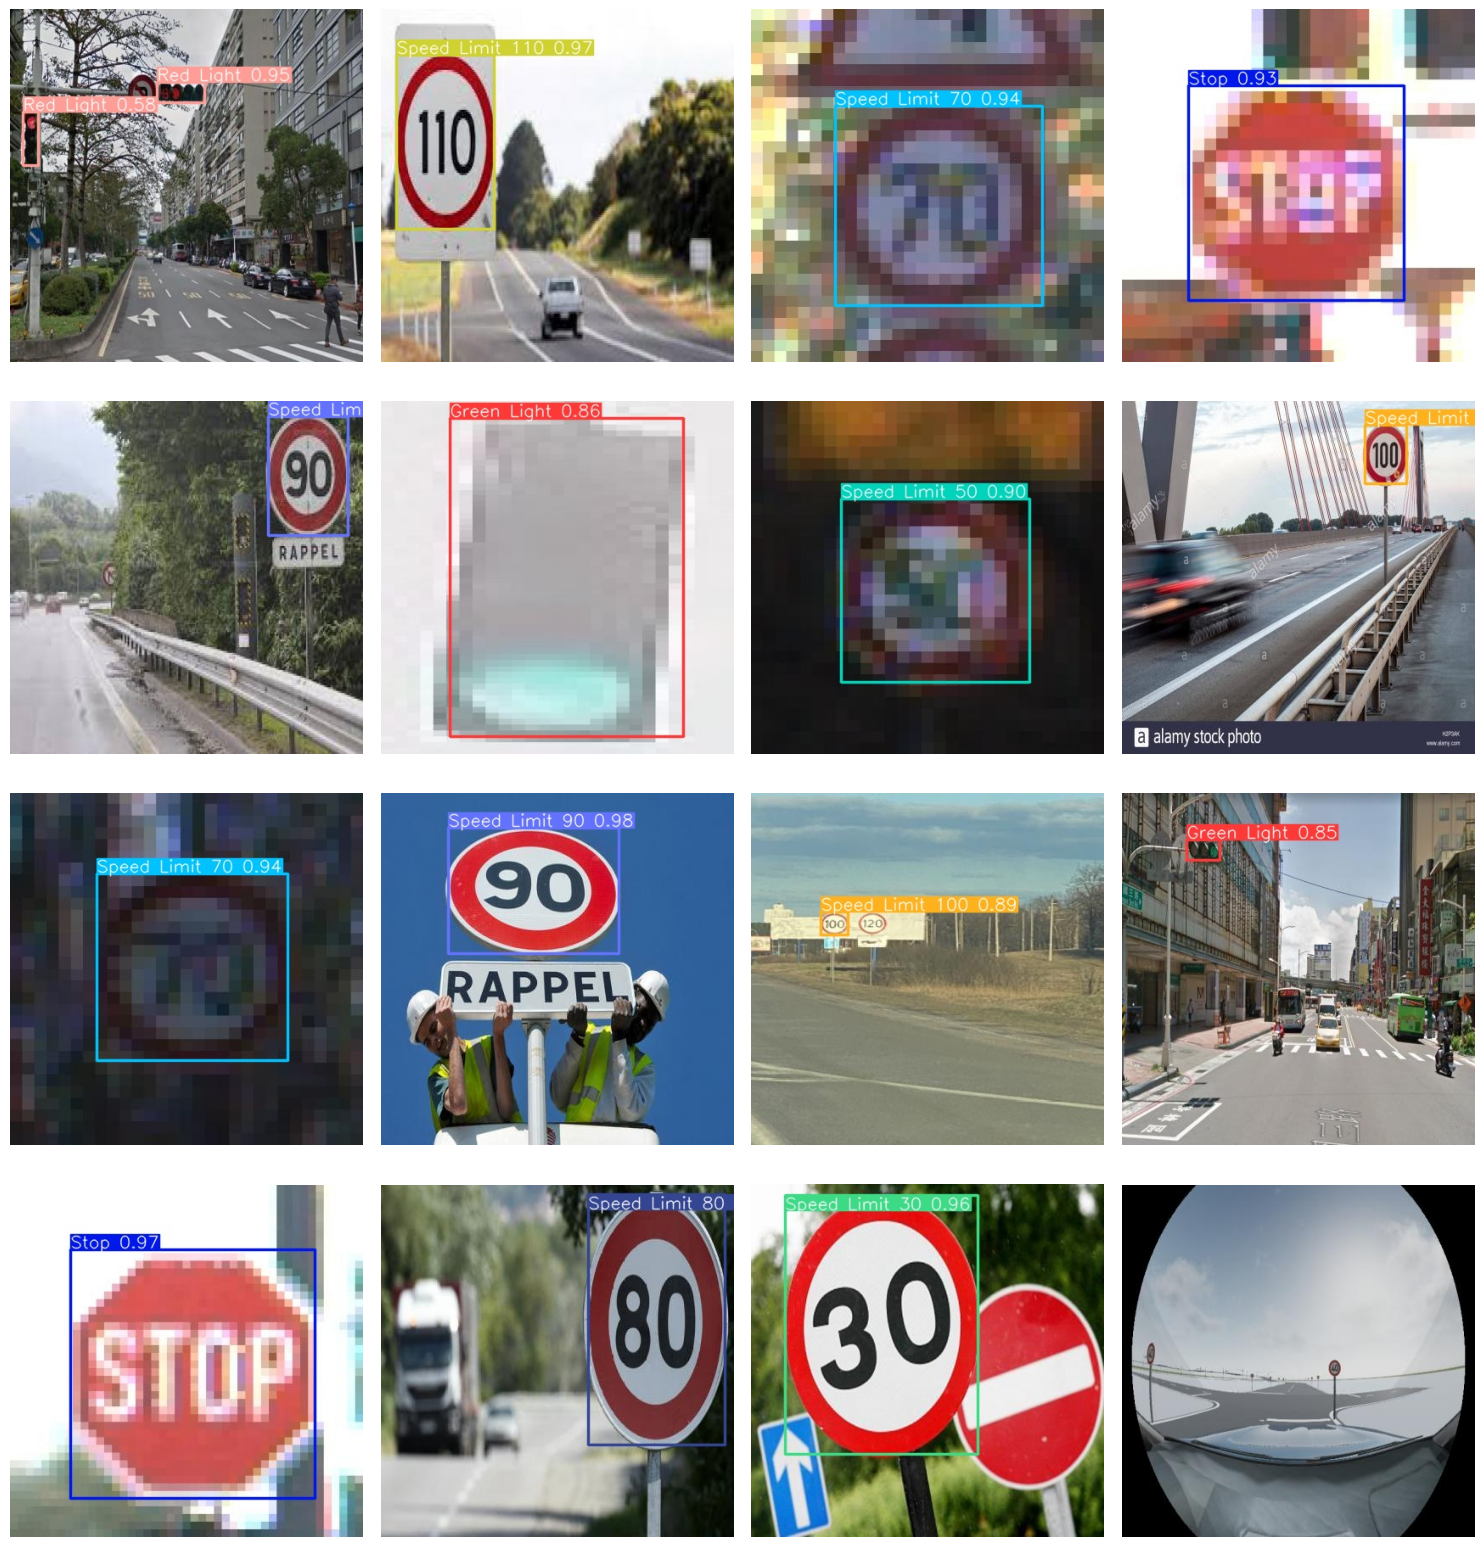

In [ ]:
num_images = len(random_image)
num_cols = 4
num_rows = (num_images + num_cols - 1) // num_cols  # Calculate the number of rows needed

plt.figure(figsize=(15, 4 * num_rows))  # Adjust the figure size according to the number of rows

for i in range(2, 18):
    plt.subplot(num_rows, num_cols, i-1)
    plt.imshow(plt.imread(f"/kaggle/working/runs/detect/train{i}/image0.jpg"))
    plt.axis('off')
plt.tight_layout()
plt.show()